### Importing and Merging Data

## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

In [43]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [45]:
churn_data.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [46]:
customer_data.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [47]:
internet_data.head()

customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  
2               No          No          No              No  
3              Yes         Yes          No              No  
4               No          No          No              No

In [48]:
print(len(churn_data))
print(len(customer_data))
print(len(internet_data))

7043
7043
7043


In [49]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [50]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [51]:
# Let's see the head of our master dataset
telecom.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      Yes         No  No phone service             DSL             No   
1       No         No                No             DSL            Yes   
2       No         No                No             DSL            Yes   
3       No         No  No phone service             DSL            Yes   
4       No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

In [52]:
telecom.describe()

tenure  MonthlyCharges  SeniorCitizen
count  7043.000000     7043.000000    7043.000000
mean     32.371149       64.761692       0.162147
std      24.559481       30.090047       0.368612
min       0.000000       18.250000       0.000000
25%       9.000000       35.500000       0.000000
50%      29.000000       70.350000       0.000000
75%      55.000000       89.850000       0.000000
max      72.000000      118.750000       1.000000

### Data Preparation

In [53]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [54]:
telecom.Contract.head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

In [55]:
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
# #Adding the results to the master dataframe
# telecom = pd.concat([telecom,cont],axis=1)
cont

Contract_One year  Contract_Two year
0                     0                  0
1                     1                  0
2                     0                  0
3                     1                  0
4                     0                  0
...                 ...                ...
7038                  1                  0
7039                  1                  0
7040                  0                  0
7041                  0                  0
7042                  0                  1

[7043 rows x 2 columns]

In [56]:
telecom.PaymentMethod.head()

0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: PaymentMethod, dtype: object

In [57]:
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)
pm

PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0                               0   

      PaymentMethod_Mailed check  
0                              0  
1                              1  
2                              1  
3                              0  
4                              0  
...                          ...  
7038                           1  
7039                           0  
7040                           0  
7041                           1  
7042                           0  

[7043 rows x 3 columns]

In [58]:
telecom['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [59]:
# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
gen.head() 

gender_Male
0            0
1            1
2            1
3            1
4            0

In [60]:
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)
telecom.head()

customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  gender  ...  \
0           Electronic check           29.85        29.85      0  Female  ...   
1               Mailed check           56.95       1889.5      0    Male  ...   
2               Mailed check           53.85       108.15      1    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75      0    Male  ...   
4           Electronic check           70.70       151.65      1  Female  ...   

   OnlineSecurity  OnlineBackup  DeviceProtection TechSupport StreamingTV  \
0              No           Yes                No          No          No   
1             Yes            No               Yes          No          No   
2             Yes           Yes                No          No          No   
3             Yes            No               Yes         Yes          No   
4              No            No                No          No          No   

  StreamingMovies PaymentMethod_Credit card (automatic)  \
0              No                                     0   
1              No                                     0   
2              No                                     0   
3              No                                     0   
4              No                                     0   

  PaymentMethod_Electronic check PaymentMethod_Mailed check gender_Male  
0                              1                          0           0  
1                              0                          1           1  
2                              0                          1           1  
3                              0                          0           1  
4                              1                          0           0  

[5 rows x 25 columns]

In [61]:


# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\2801068944.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'],1)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\2801068944.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1= os.drop(['OnlineSecurity_No internet service'],1)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\2801068944.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 =ob.drop(['OnlineBackup_No internet service'],1)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\2801068944.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DeviceProtection_

In [62]:
telecom.head()

customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  gender  ...  \
0           Electronic check           29.85        29.85      0  Female  ...   
1               Mailed check           56.95       1889.5      0    Male  ...   
2               Mailed check           53.85       108.15      1    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75      0    Male  ...   
4           Electronic check           70.70       151.65      1  Female  ...   

   OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                0                 1                    1   
1                1                 0                    0   
2                0                 1                    1   
3                1                 0                    0   
4                1                 0                    1   

  DeviceProtection_Yes TechSupport_No TechSupport_Yes StreamingTV_No  \
0                    0              1               0              1   
1                    1              1               0              1   
2                    0              1               0              1   
3                    1              0               1              1   
4                    0              1               0              1   

  StreamingTV_Yes StreamingMovies_No StreamingMovies_Yes  
0               0                  1                   0  
1               0                  1                   0  
2               0                  1                   0  
3               0                  1                   0  
4               0                  1                   0  

[5 rows x 41 columns]

### Dropping the repeated variables

In [63]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\398896987.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


In [64]:
#The varaible was imported as a string we need to convert it to float
# telecom['TotalCharges'] =telecom['TotalCharges'].astype(float)
telecom['tenure'] = telecom['tenure'].astype(int).astype(float)

In [65]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   float64
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 11  Paym

Now we can see we have all variables as integer.

### Checking for Outliers

In [66]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [67]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

tenure  MonthlyCharges  SeniorCitizen
count  7043.000000     7043.000000    7043.000000
mean     32.371149       64.761692       0.162147
std      24.559481       30.090047       0.368612
min       0.000000       18.250000       0.000000
25%       9.000000       35.500000       0.000000
50%      29.000000       70.350000       0.000000
75%      55.000000       89.850000       0.000000
90%      69.000000      102.600000       1.000000
95%      72.000000      107.400000       1.000000
99%      72.000000      114.729000       1.000000
max      72.000000      118.750000       1.000000

From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [68]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBackup_Yes                         0.0
DeviceProt

In [69]:
# Removing NaN TotalCharges rows
# telecom = telecom[np.isnan(telecom['TotalCharges'])]

In [70]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBackup_Yes                         0.0
DeviceProt

Now we don't have any missing values

### Feature Standardisation

In [71]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [72]:
normalized_df=(df-df.mean())/df.std()
normalized_df

C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\2003302436.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df-df.mean())/df.std()


MonthlyCharges TotalCharges    tenure
0          -1.160241          NaN -1.277354
1          -0.259611          NaN  0.066323
2          -0.362635          NaN -1.236636
3          -0.746482          NaN  0.514215
4           0.197351          NaN -1.236636
...              ...          ...       ...
7038        0.665945          NaN -0.340852
7039        1.277443          NaN  1.613587
7040       -1.168549          NaN -0.870179
7041        0.320315          NaN -1.155201
7042        1.358865          NaN  1.369282

[7043 rows x 3 columns]

In [73]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom

C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\1041202712.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)


customerID  PhoneService  PaperlessBilling  Churn  SeniorCitizen  \
0     7590-VHVEG             0                 1      0              0   
1     5575-GNVDE             1                 0      0              0   
2     3668-QPYBK             1                 1      1              0   
3     7795-CFOCW             0                 0      0              0   
4     9237-HQITU             1                 1      1              0   
...          ...           ...               ...    ...            ...   
7038  6840-RESVB             1                 1      0              0   
7039  2234-XADUH             1                 1      0              0   
7040  4801-JZAZL             0                 1      0              0   
7041  8361-LTMKD             1                 1      1              1   
7042  3186-AJIEK             1                 1      0              0   

      Partner  Dependents  PaymentMethod_Credit card (automatic)  \
0           1           0                                      0   
1           0           0                                      0   
2           0           0                                      0   
3           0           0                                      0   
4           0           0                                      0   
...       ...         ...                                    ...   
7038        1           1                                      0   
7039        1           1                                      1   
7040        1           1                                      0   
7041        1           0                                      0   
7042        0           0                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  ...  \
0                                  1                           0  ...   
1                                  0                           1  ...   
2                                  0                           1  ...   
3                                  0                           0  ...   
4                                  1                           0  ...   
...                              ...                         ...  ...   
7038                               0                           1  ...   
7039                               0                           0  ...   
7040                               1                           0  ...   
7041                               0                           1  ...   
7042                               0                           0  ...   

      OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                   0                 1                    1   
1                   1                 0                    0   
2                   0                 1                    1   
3                   1                 0                    0   
4                   1                 0                    1   
...               ...               ...                  ...   
7038                1                 0                    0   
7039                0                 1                    0   
7040                1                 0                    1   
7041                1                 0                    1   
7042                1                 0                    0   

      DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                        0               1                0               1   
1                        1               1                0               1   
2                        0               1                0               1   
3                        1               0                1               1   
4                        0               1                0               1   
...                    ...             ...              ...             ...   
7038                     1               0                1               0   
7039                  

In [74]:
telecom = pd.concat([telecom,normalized_df],axis=1)
telecom.head()

customerID  PhoneService  PaperlessBilling  Churn  SeniorCitizen  Partner  \
0  7590-VHVEG             0                 1      0              0        1   
1  5575-GNVDE             1                 0      0              0        0   
2  3668-QPYBK             1                 1      1              0        0   
3  7795-CFOCW             0                 0      0              0        0   
4  9237-HQITU             1                 1      1              0        0   

   Dependents  PaymentMethod_Credit card (automatic)  \
0           0                                      0   
1           0                                      0   
2           0                                      0   
3           0                                      0   
4           0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  ...  \
0                               1                           0  ...   
1                               0                           1  ...   
2                               0                           1  ...   
3                               0                           0  ...   
4                               1                           0  ...   

   DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                     0               1                0               1   
1                     1               1                0               1   
2                     0               1                0               1   
3                     1               0                1               1   
4                     0               1                0               1   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  MonthlyCharges  \
0                0                   1                    0       -1.160241   
1                0                   1                    0       -0.259611   
2                0                   1                    0       -0.362635   
3                0                   1                    0       -0.746482   
4                0                   1                    0        0.197351   

   TotalCharges    tenure  
0           NaN -1.277354  
1           NaN  0.066323  
2           NaN -1.236636  
3           NaN  0.514215  
4           NaN -1.236636  

[5 rows x 30 columns]

### Checking the Churn Rate

In [75]:
#churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
#churn

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [76]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [78]:
import statsmodels.api as sm

In [82]:
# # Logistic regression model
# logm1 = sm.GLM(y_train,X_train)#family = sm.families.Binomial()
# logm1.fit().summary()

### Correlation Matrix

In [83]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

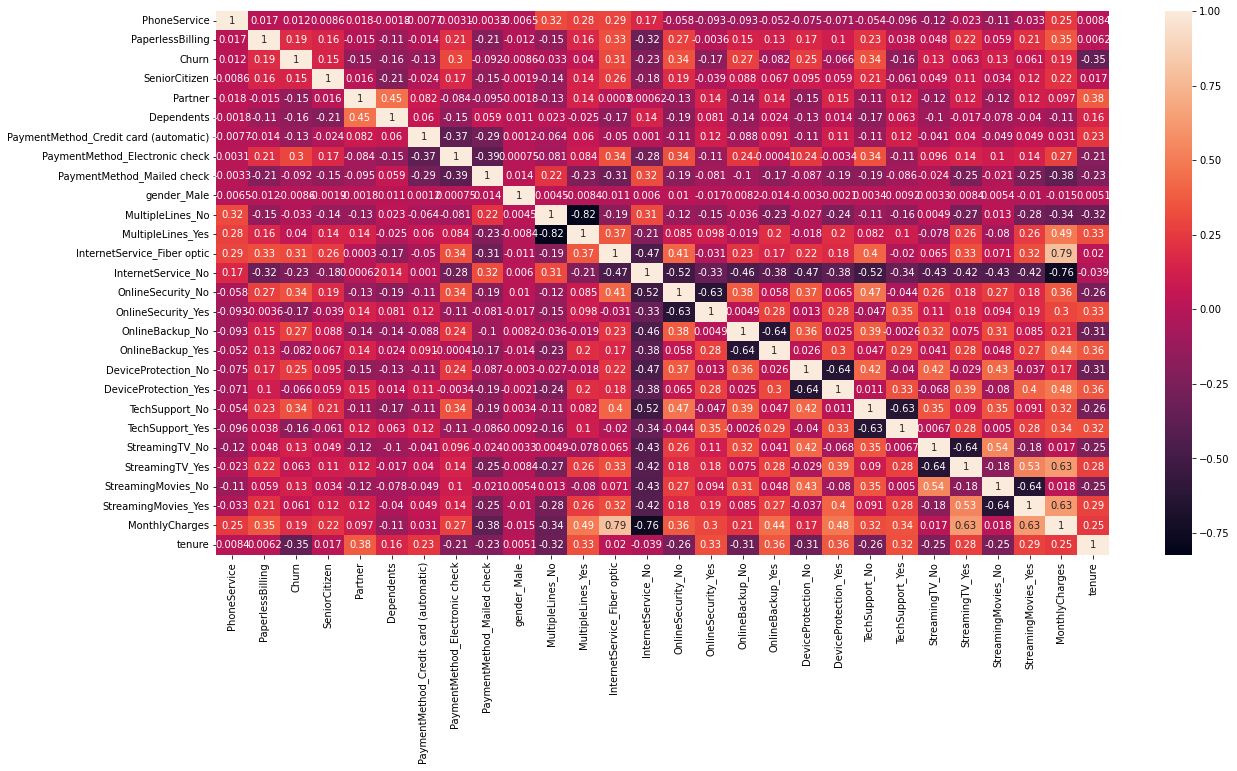

In [84]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [85]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\1191024438.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_10408\1191024438.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)


### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

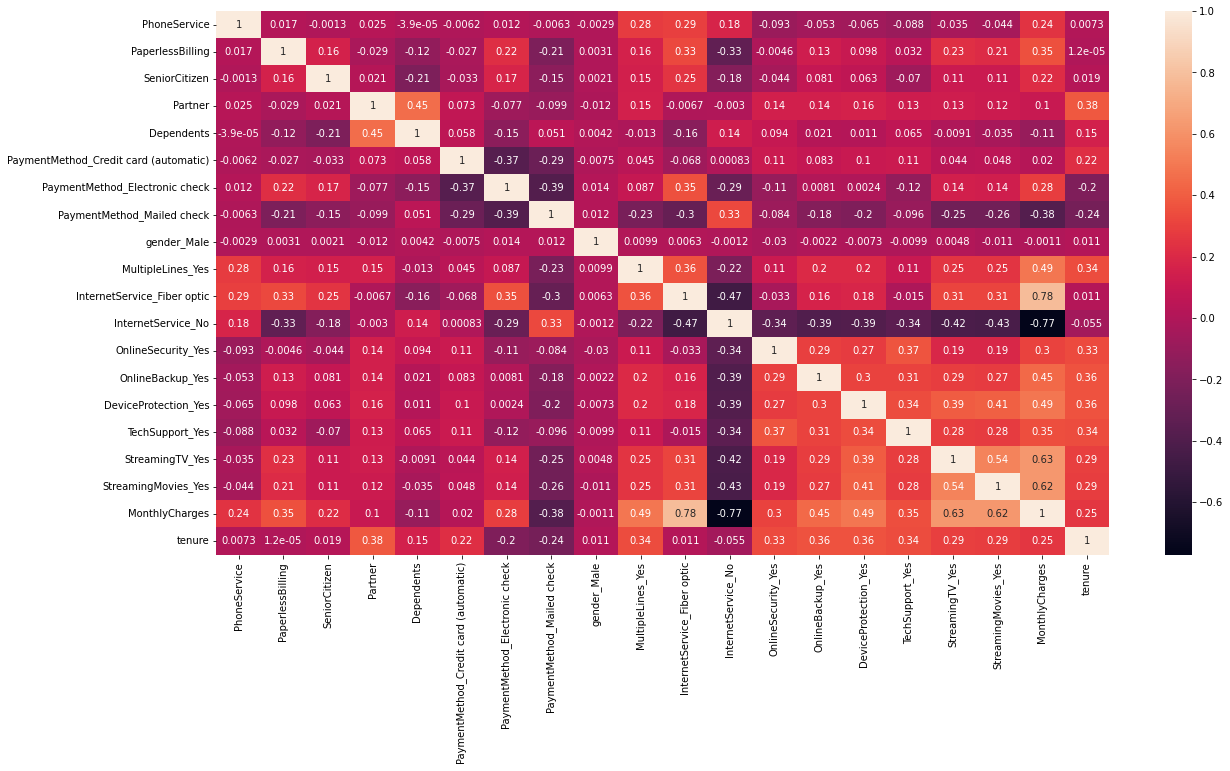

In [86]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [88]:
# logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
# logm2.fit().summary()

### Feature Selection Using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

In [ ]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

In [ ]:
X_test[col].shape
#res = modres.predict(X_test[col])

### Making Predictions

In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

### Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

In [ ]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [ ]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

#### We see an overall AUC score of 0.83 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [ ]:
X_train.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

#### Components from the PCA

In [ ]:
pca.components_

Looking at the explained variance ratio for each component

In [ ]:
pca.explained_variance_ratio_

Making a scree plot for the explained variance

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=16)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

# Plotting the heatmap of the corr matrix

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

### Applying logistic regression on the data on our Principal components

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

#### Making it a little more unsupervised 

In [ ]:
pca_again = PCA(0.9)

In [ ]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [ ]:
df_train_pca2.shape

Following it up with a logistic regression model

In [ ]:
learner_pca2 = LogisticRegression()

In [ ]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [ ]:
df_test_pca2 = pca_again.transform(X_test)

In [ ]:
df_test_pca2.shape

In [ ]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

PCA is great!